In [1]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


def change_obj_to_category(df):
    i=0;
    while i<df.columns.size:
        if (df.dtypes[df.columns[i]] == 'object' or df.dtypes[df.columns[i]] == 'bool'):
            col = df.dtypes.index[i]
            df[col] = df[col].astype('category')
        i = i+1  
        
def change_int_to_float(df):
    i=0;
    while i<df.columns.size:
        if 'int' in str(df.dtypes[df.columns[i]]):
            col = df.dtypes.index[i]
            df[col] = df[col].astype('float64')
        i = i+1
        
def score_model(model,X,Y,scoring='accuracy'):
    return model.score(X,Y)
        
        
def roc_score_model(model,X,Y):
    from sklearn.metrics import roc_auc_score
    return roc_auc_score(Y,pd.DataFrame((model.predict_proba(X)))[1].tolist())

def feature_imp(colNames,imps):
    df = pd.DataFrame(columns=('Feature','Importance'),index=[x for x in range(0,len(colNames))])
    i = 0
    for col in colNames:
        df['Feature'][i] = col
        df['Importance'][i] = imps[i]
        i=i+1
    
    df = df.sort_values(by='Importance',ascending=False)
    return df

def predict_th(model,tx,ty,threshold=0.5):
    import pandas as pd
    probs = model.predict_proba(tx)[:,1].tolist()
    predictions = []
    for i in range(0,len(ty)):
        if probs[i]>threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    
    return predictions   


def generateXY(df,target_col,var_list):
    
    #make a copy of the required subset and drop rows containing Na
    mdata = df[var_list+[target_col]]
    mdata.dropna(inplace=True)
    
    #Separate target and put it in Y
    Y = mdata[target_col].tolist()
    del mdata[target_col]
    
    #Now, process data and create dummy variables if required with final data in Xvars
    import pandas
    Xvars = pandas.DataFrame()
    import pandas as pd
    for cols in var_list:
        if (str(mdata[cols].dtype) == 'category'):
            dummySer= pd.get_dummies(mdata[cols],prefix=cols+'_')
            Xvars = pd.concat([Xvars,dummySer],axis=1)
        else:
            Xvars =  pd.concat([Xvars,mdata[cols]],axis=1)
    
    X = Xvars
    
    return X,Y 

In [70]:
import pandas as pd
import numpy as np
print('Starting data read from csv file.')
bank_full = pd.read_csv('bank_dataset.csv',sep=',')

Starting data read from csv file.


In [71]:
del bank_full['Unnamed: 0']

In [72]:
bank_past=bank_full.loc[bank_full['pastCam_exposed']==1]
bank_present=bank_full.loc[bank_full['pastCam_exposed']==0]

In [73]:
bank_past.shape

(5625, 21)

In [74]:
bank_present.shape

(35563, 21)

In [75]:
bank_present.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housingLoan', 'personalLoan', 'contactMethod', 'contactMonth', 'contactDay', 'contactDuration', 'numberOfContact', 'pastCam_numberOfContact', 'pastCam_result', 'idx_employment', 'idx_price', 'idx_confidence', 'idx_euribor', 'idx_employeesNum', 'subscribe', 'pastCam_exposed'], dtype='object')

In [76]:
bank_past.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housingLoan', 'personalLoan', 'contactMethod', 'contactMonth', 'contactDay', 'contactDuration', 'numberOfContact', 'pastCam_numberOfContact', 'pastCam_result', 'idx_employment', 'idx_price', 'idx_confidence', 'idx_euribor', 'idx_employeesNum', 'subscribe', 'pastCam_exposed'], dtype='object')

In [77]:
del bank_present['pastCam_numberOfContact']
del bank_present['pastCam_result']
del bank_present['pastCam_exposed']
del bank_past['pastCam_exposed']

Present:

Logistic Regression CV precision Score: 0.566054072196
Naive Bayes CV precision Score: 0.374234079299
Random Forest CV precision Score: 0.500197817157
Gradient Boosting CV precision Score: 0.60649264397


Logistic Regression accuracy CV Score: 0.91746908782
Naive Bayes accuracy CV Score: 0.871458850771
Random Forest accuracy CV Score: 0.910474310633
Gradient Boosting accuracy CV Score: 0.921722206725


GBC Performance on Test
Accuracy Score: 0.926050892732


Confusion Matrix for GBC Test output
Confusion matrix, without normalization
[[6355  130]
 [ 396  232]]


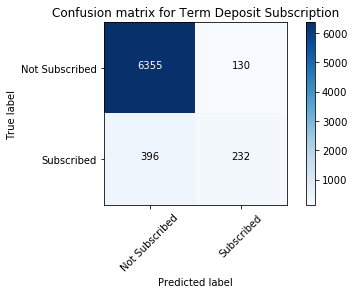

Normalized confusion matrix
[[ 0.98  0.02]
 [ 0.63  0.37]]


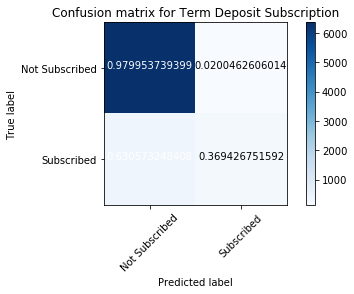



Feature Importances


,Feature,Importance
45,idx_euribor,0.302662
44,idx_confidence,0.127542
37,contactDuration__long_call,0.0807011
39,contactDuration__short_call,0.0739373
46,idx_employeesNum,0.0466318
43,idx_price,0.0352352
38,contactDuration__med_call,0.0208036
42,idx_employment,0.0202118
26,contactMethod__cellular,0.0187331
35,contactDay__tue,0.0166705


In [108]:
#Modelling
#Feature List                
iv = ['age', 'job', 'marital', 'education', 'default', 'housingLoan', 'personalLoan', 'contactMethod', 'contactMonth', 'contactDay', 'contactDuration', 'numberOfContact', 'idx_employment', 'idx_price', 'idx_confidence', 'idx_euribor', 'idx_employeesNum']
#Dependent Variable                      
dv = 'subscribe'

bank = bank_present[iv+[dv]]


change_obj_to_category(bank)
change_int_to_float(bank)


#Performing 80/20 split

from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(bank, train_size = 0.8,random_state=2135)
varToUse = iv
Train_X,Train_Y = generateXY(train_data,dv,varToUse)
Test_X,Test_Y = generateXY(test_data,dv,varToUse)

from sklearn import model_selection
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


cv = model_selection.KFold(5)
lr_present = linear_model.LogisticRegression(C=100000)
nb_present = GaussianNB()
rf_present = RandomForestClassifier()
gbc_present = GradientBoostingClassifier()
kFold = 5

#print('LR')
cv_precision_score_lr = np.mean(model_selection.cross_val_score(lr_present, Train_X, Train_Y, cv=kFold,scoring='precision'))
cv_accuracy_score_lr = np.mean(model_selection.cross_val_score(lr_present, Train_X, Train_Y, cv=kFold,scoring='accuracy'))
#print('NB')
cv_precision_score_nb = np.mean(model_selection.cross_val_score(nb_present, Train_X, Train_Y, cv=kFold,scoring='precision'))
cv_accuracy_score_nb = np.mean(model_selection.cross_val_score(nb_present, Train_X, Train_Y, cv=kFold,scoring='accuracy'))
#print('RF')
cv_precision_score_rf = np.mean(model_selection.cross_val_score(rf_present, Train_X, Train_Y, cv=kFold,scoring='precision'))
cv_accuracy_score_rf = np.mean(model_selection.cross_val_score(rf_present, Train_X, Train_Y, cv=kFold,scoring='accuracy'))
#print('GBC')
cv_precision_score_gbc = np.mean(model_selection.cross_val_score(gbc_present, Train_X, Train_Y, cv=kFold,scoring='precision'))
cv_accuracy_score_gbc = np.mean(model_selection.cross_val_score(gbc_present, Train_X, Train_Y, cv=kFold,scoring='accuracy'))

#1:
print('Logistic Regression CV precision Score: ' + str(cv_precision_score_lr))
print('Naive Bayes CV precision Score: ' + str(cv_precision_score_nb))
print('Random Forest CV precision Score: ' + str(cv_precision_score_rf))
print('Gradient Boosting CV precision Score: ' + str(cv_precision_score_gbc))

print ('\n')

print('Logistic Regression accuracy CV Score: ' + str(cv_accuracy_score_lr))
print('Naive Bayes accuracy CV Score: ' + str(cv_accuracy_score_nb))
print('Random Forest accuracy CV Score: ' + str(cv_accuracy_score_rf))
print('Gradient Boosting accuracy CV Score: ' + str(cv_accuracy_score_gbc))

from sklearn import metrics
#2 Precision and Recall.

print ('\n')
#GBC ON Test
print('GBC Performance on Test')
gbc_present.fit(Train_X,Train_Y)
lr_present.fit(Train_X,Train_Y)
nb_present.fit(Train_X,Train_Y)
rf_present.fit(Train_X,Train_Y)
#gbc_Pred = gbc.predict(Test_X)
print('Accuracy Score: ' + str(score_model(gbc_present,Test_X,Test_Y)))


print ('\n')
print ('Confusion Matrix for GBC Test output')
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    np.set_printoptions(precision=2)
    plt.figure()
    import itertools    
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.figure()
    plt.show()

# Compute confusion matrix
#cnf_matrix = confusion_matrix(Test_Y, predict_th(gbc,Test_X,Test_Y,threshold=0.36))
cnf_matrix = confusion_matrix(Test_Y, gbc_present.predict(Test_X))
np.set_printoptions(precision=2)
plt.figure()
import itertools
plot_confusion_matrix(cnf_matrix, classes=['Not Subscribed','Subscribed'],
                      title='Confusion matrix for Term Deposit Subscription')
plt.figure()
plt.show()
# Plot normalized confusion matrix
plt.figure()

plot_confusion_matrix(cnf_matrix, classes=['Not Subscribed','Subscribed'], normalize=True,
                      title='Confusion matrix for Term Deposit Subscription')

plt.show()

print ('\n')
print('Feature Importances')
feature_imp(Train_X.columns,gbc_present.feature_importances_)

In [109]:
Train_X_present=Train_X
Train_Y_present=Train_Y
Test_X_present=Test_X
Test_Y_present=Test_Y

In [110]:
print(Train_X_present.shape)
print(len(Train_Y_present))
print(Test_X_present.shape)
print(len(Test_Y_present))

(28450, 47)
28450
(7113, 47)
7113


Past:


Logistic Regression CV precision Score: 0.720617092167
Naive Bayes CV precision Score: 0.55933454669
Random Forest CV precision Score: 0.691430087556
Gradient Boosting CV precision Score: 0.702771307809


Logistic Regression accuracy CV Score: 0.83600461098
Naive Bayes accuracy CV Score: 0.780891240606
Random Forest accuracy CV Score: 0.82444114979
Gradient Boosting accuracy CV Score: 0.83889029136


GBC Performance on Test
Accuracy Score: 0.844444444444


Confusion Matrix for GBC Test output
Confusion matrix, without normalization
[[739  76]
 [ 99 211]]


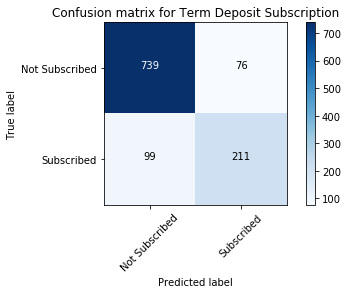

Normalized confusion matrix
[[ 0.91  0.09]
 [ 0.32  0.68]]


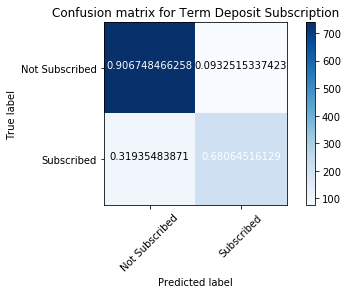



Feature Importances


,Feature,Importance
48,idx_euribor,0.287886
47,idx_confidence,0.0766071
27,pastCam_result__failure,0.0624319
42,contactDuration__short_call,0.0620834
49,idx_employeesNum,0.0531956
28,pastCam_result__success,0.048382
46,idx_price,0.0349774
31,contactMonth__Q1,0.029816
40,contactDuration__long_call,0.0287509
4,age__60s+,0.0287212


In [96]:
#Modelling
#Feature List                
iv = ['age', 'job', 'marital', 'education', 'default', 'housingLoan', 'personalLoan', 'pastCam_numberOfContact', 'pastCam_result','contactMethod', 'contactMonth', 'contactDay', 'contactDuration', 'numberOfContact', 'idx_employment', 'idx_price', 'idx_confidence', 'idx_euribor', 'idx_employeesNum']
#Dependent Variable                      
dv = 'subscribe'

bank = bank_past[iv+[dv]]

change_obj_to_category(bank)
change_int_to_float(bank)


#Performing 80/20 split

from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(bank, train_size = 0.8,random_state=2135)
varToUse = iv
Train_X,Train_Y = generateXY(train_data,dv,varToUse)
Test_X,Test_Y = generateXY(test_data,dv,varToUse)

from sklearn import model_selection
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


cv = model_selection.KFold(5)
lr_past = linear_model.LogisticRegression(C=100000)
nb_past = GaussianNB()
rf_past = RandomForestClassifier()
gbc_past = GradientBoostingClassifier()
kFold = 5

print("")
#print('LR')
cv_precision_score_lr = np.mean(model_selection.cross_val_score(lr_past, Train_X, Train_Y, cv=kFold,scoring='precision'))
cv_accuracy_score_lr = np.mean(model_selection.cross_val_score(lr_past, Train_X, Train_Y, cv=kFold,scoring='accuracy'))
#print('NB')
cv_precision_score_nb = np.mean(model_selection.cross_val_score(nb_past, Train_X, Train_Y, cv=kFold,scoring='precision'))
cv_accuracy_score_nb = np.mean(model_selection.cross_val_score(nb_past, Train_X, Train_Y, cv=kFold,scoring='accuracy'))
#print('RF')
cv_precision_score_rf = np.mean(model_selection.cross_val_score(rf_past, Train_X, Train_Y, cv=kFold,scoring='precision'))
cv_accuracy_score_rf = np.mean(model_selection.cross_val_score(rf_past, Train_X, Train_Y, cv=kFold,scoring='accuracy'))
#print('GBC')
cv_precision_score_gbc = np.mean(model_selection.cross_val_score(gbc_past, Train_X, Train_Y, cv=kFold,scoring='precision'))
cv_accuracy_score_gbc = np.mean(model_selection.cross_val_score(gbc_past, Train_X, Train_Y, cv=kFold,scoring='accuracy'))

#1:
print('Logistic Regression CV precision Score: ' + str(cv_precision_score_lr))
print('Naive Bayes CV precision Score: ' + str(cv_precision_score_nb))
print('Random Forest CV precision Score: ' + str(cv_precision_score_rf))
print('Gradient Boosting CV precision Score: ' + str(cv_precision_score_gbc))

print ('\n')

print('Logistic Regression accuracy CV Score: ' + str(cv_accuracy_score_lr))
print('Naive Bayes accuracy CV Score: ' + str(cv_accuracy_score_nb))
print('Random Forest accuracy CV Score: ' + str(cv_accuracy_score_rf))
print('Gradient Boosting accuracy CV Score: ' + str(cv_accuracy_score_gbc))

from sklearn import metrics
#2 Precision and Recall.

print ('\n')
#GBC ON Test
print('GBC Performance on Test')
gbc_past.fit(Train_X,Train_Y)
lr_past.fit(Train_X,Train_Y)
nb_past.fit(Train_X,Train_Y)
rf_past.fit(Train_X,Train_Y)
#gbc_Pred = gbc.predict(Test_X)
print('Accuracy Score: ' + str(score_model(gbc_past,Test_X,Test_Y)))


print ('\n')
print ('Confusion Matrix for GBC Test output')
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    np.set_printoptions(precision=2)
    plt.figure()
    import itertools    
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.figure()
    plt.show()

# Compute confusion matrix
#cnf_matrix = confusion_matrix(Test_Y, predict_th(gbc,Test_X,Test_Y,threshold=0.36))
cnf_matrix = confusion_matrix(Test_Y, gbc_past.predict(Test_X))
np.set_printoptions(precision=2)
plt.figure()
import itertools
plot_confusion_matrix(cnf_matrix, classes=['Not Subscribed','Subscribed'],
                      title='Confusion matrix for Term Deposit Subscription')
plt.figure()
plt.show()
# Plot normalized confusion matrix
plt.figure()

plot_confusion_matrix(cnf_matrix, classes=['Not Subscribed','Subscribed'], normalize=True,
                      title='Confusion matrix for Term Deposit Subscription')

plt.show()

print ('\n')
print('Feature Importances')
feature_imp(Train_X.columns,gbc_past.feature_importances_)

In [97]:
Train_X_past=Train_X
Train_Y_past=Train_Y
Test_X_past=Test_X
Test_Y_past=Test_Y

In [98]:
print(Train_X_past.shape)
print(len(Train_Y_past))
print(Test_X_past.shape)
print(len(Test_Y_past))

(4500, 50)
4500
(1125, 50)
1125


Full Model:


Logistic Regression CV precision Score: 0.627090069489
Naive Bayes CV precision Score: 0.414564981361
Random Forest CV precision Score: 0.572192990035
Gradient Boosting CV precision Score: 0.655420775247


Logistic Regression accuracy CV Score: 0.904431176189
Naive Bayes accuracy CV Score: 0.856115274248
Random Forest accuracy CV Score: 0.897086627285
Gradient Boosting accuracy CV Score: 0.910349132572


GBC Performance on Test
Accuracy Score: 0.908351541636


Confusion Matrix for GBC Test output
Confusion matrix, without normalization
[[7078  216]
 [ 539  405]]


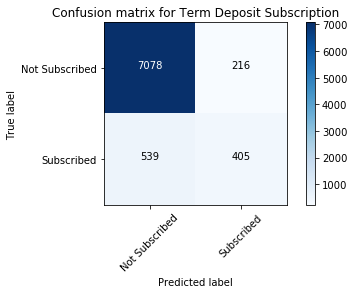

Normalized confusion matrix
[[ 0.97  0.03]
 [ 0.57  0.43]]


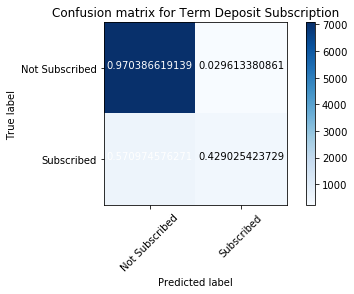



Feature Importances


,Feature,Importance
45,idx_euribor,0.324635
39,contactDuration__short_call,0.0850709
46,idx_employeesNum,0.0827086
44,idx_confidence,0.0733462
43,idx_price,0.0631639
37,contactDuration__long_call,0.0613814
42,idx_employment,0.0368771
26,contactMethod__cellular,0.0249604
33,contactDay__mon,0.0217783
4,age__60s+,0.0186546


In [99]:
#Modelling
#Feature List                
iv = ['age', 'job', 'marital', 'education', 'default', 'housingLoan', 'personalLoan', 'contactMethod', 'contactMonth', 'contactDay', 'contactDuration', 'numberOfContact', 'idx_employment', 'idx_price', 'idx_confidence', 'idx_euribor', 'idx_employeesNum']
#Dependent Variable                      
dv = 'subscribe'

bank = bank_full[iv+[dv]]


change_obj_to_category(bank)
change_int_to_float(bank)


#Performing 80/20 split

from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(bank, train_size = 0.8,random_state=2135)
varToUse = iv
Train_X,Train_Y = generateXY(train_data,dv,varToUse)
Test_X,Test_Y = generateXY(test_data,dv,varToUse)

from sklearn import model_selection
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


cv = model_selection.KFold(5)
lr_full = linear_model.LogisticRegression(C=100000)
nb_full = GaussianNB()
rf_full = RandomForestClassifier()
gbc_full = GradientBoostingClassifier()
kFold = 5

#print('LR')
cv_precision_score_lr = np.mean(model_selection.cross_val_score(lr_full, Train_X, Train_Y, cv=kFold,scoring='precision'))
cv_accuracy_score_lr = np.mean(model_selection.cross_val_score(lr_full, Train_X, Train_Y, cv=kFold,scoring='accuracy'))
#print('NB')
cv_precision_score_nb = np.mean(model_selection.cross_val_score(nb_full, Train_X, Train_Y, cv=kFold,scoring='precision'))
cv_accuracy_score_nb = np.mean(model_selection.cross_val_score(nb_full, Train_X, Train_Y, cv=kFold,scoring='accuracy'))
#print('RF')
cv_precision_score_rf = np.mean(model_selection.cross_val_score(rf_full, Train_X, Train_Y, cv=kFold,scoring='precision'))
cv_accuracy_score_rf = np.mean(model_selection.cross_val_score(rf_full, Train_X, Train_Y, cv=kFold,scoring='accuracy'))
#print('GBC')
cv_precision_score_gbc = np.mean(model_selection.cross_val_score(gbc_full, Train_X, Train_Y, cv=kFold,scoring='precision'))
cv_accuracy_score_gbc = np.mean(model_selection.cross_val_score(gbc_full, Train_X, Train_Y, cv=kFold,scoring='accuracy'))

#1:
print('Logistic Regression CV precision Score: ' + str(cv_precision_score_lr))
print('Naive Bayes CV precision Score: ' + str(cv_precision_score_nb))
print('Random Forest CV precision Score: ' + str(cv_precision_score_rf))
print('Gradient Boosting CV precision Score: ' + str(cv_precision_score_gbc))

print ('\n')

print('Logistic Regression accuracy CV Score: ' + str(cv_accuracy_score_lr))
print('Naive Bayes accuracy CV Score: ' + str(cv_accuracy_score_nb))
print('Random Forest accuracy CV Score: ' + str(cv_accuracy_score_rf))
print('Gradient Boosting accuracy CV Score: ' + str(cv_accuracy_score_gbc))

from sklearn import metrics
#2 Precision and Recall.

print ('\n')
#GBC ON Test
print('GBC Performance on Test')
gbc_full.fit(Train_X,Train_Y)
lr_full.fit(Train_X,Train_Y)
nb_full.fit(Train_X,Train_Y)
rf_full.fit(Train_X,Train_Y)
#gbc_Pred = gbc.predict(Test_X)
print('Accuracy Score: ' + str(score_model(gbc_full,Test_X,Test_Y)))


print ('\n')
print ('Confusion Matrix for GBC Test output')
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    np.set_printoptions(precision=2)
    plt.figure()
    import itertools    
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.figure()
    plt.show()

# Compute confusion matrix
#cnf_matrix = confusion_matrix(Test_Y, predict_th(gbc,Test_X,Test_Y,threshold=0.36))
cnf_matrix = confusion_matrix(Test_Y, gbc_full.predict(Test_X))
np.set_printoptions(precision=2)
plt.figure()
import itertools
plot_confusion_matrix(cnf_matrix, classes=['Not Subscribed','Subscribed'],
                      title='Confusion matrix for Term Deposit Subscription')
plt.figure()
plt.show()
# Plot normalized confusion matrix
plt.figure()

plot_confusion_matrix(cnf_matrix, classes=['Not Subscribed','Subscribed'], normalize=True,
                      title='Confusion matrix for Term Deposit Subscription')

plt.show()

print ('\n')
print('Feature Importances')
feature_imp(Train_X.columns,gbc_full.feature_importances_)

In [100]:
Train_X_full=Train_X
Train_Y_full=Train_Y
Test_X_full=Test_X
Test_Y_full=Test_Y

In [101]:
print(Train_X_full.shape)
print(len(Train_Y_full))
print(Test_X_full.shape)
print(len(Test_Y_full))

(32950, 47)
32950
(8238, 47)
8238


In [ ]:
gbc_full.fit(Train_X,Train_Y)
lr_full.fit(Train_X,Train_Y)
nb_full.fit(Train_X,Train_Y)
rf_full.fit(Train_X,Train_Y)

In [111]:
len(Test_X_present)

7113

Present::

In [112]:
mn_present_gbc=gbc_present.predict_proba(Test_X_present)
mn_present_lr=lr_present.predict_proba(Test_X_present)
mn_present_nb=nb_present.predict_proba(Test_X_present)
mn_present_rf=rf_present.predict_proba(Test_X_present)
m_present_gbc=[]
m_present_lr=[]
m_present_nb=[]
m_present_rf=[]
for i in range(len(Test_X_present)):
    m_present_gbc.append(mn_present_gbc[i][1])
    m_present_lr.append(mn_present_lr[i][1])
    m_present_nb.append(mn_present_nb[i][1])
    m_present_rf.append(mn_present_rf[i][1])
Test_present=Test_X_present
Test_present['subscribe']=Test_Y_present

In [114]:
print("GBC")
Test_present['prob']=m_present_gbc
test__present_pred=Test_present.sort_index(by=['prob'], ascending=[False])
for i in range(1,101):
    top = test__present_pred[:int(len(test__present_pred)*0.01*i)]
    print(top.subscribe.sum()/len(top))

GBC
0.7323943661971831
0.7183098591549296
0.6901408450704225
0.6408450704225352
0.6394366197183099
0.5845070422535211
0.5593561368209256
0.5536028119507909
0.528125
0.5147679324894515
0.5038363171355499
0.49824150058616645
0.47835497835497837
0.4663316582914573
0.450281425891182
0.4358523725834798
0.4267990074441687
0.41875
0.4063656550703183
0.39451476793248946
0.3804420629604823
0.3695652173913043
0.3559633027522936
0.3427065026362039
0.3312710911136108
0.32017306652244454
0.309375
0.29984932194876945
0.29049466537342383
0.2822315986872949
0.27346938775510204
0.26537785588752194
0.2590541116318705
0.2531017369727047
0.24668541582965045
0.241015625
0.23451159255036108
0.22908956328645447
0.22314347512617158
0.2179261862917399
0.21262002743484226
0.20790090391697355
0.2040549378678875
0.19974432726110578
0.195625
0.19137878324671354
0.18755608734669457
0.18365553602811951
0.17991391678622667
0.1763217097862767
0.1728701406120761
0.16955110870740941
0.16635712390554525
0.163238739911481

/Users/ashokvardhan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


In [115]:
print("LR")
Test_present['prob']=m_present_lr
test__present_pred=Test_present.sort_index(by=['prob'], ascending=[False])
for i in range(1,101):
    top = test__present_pred[:int(len(test__present_pred)*0.01*i)]
    print(top.subscribe.sum()/len(top))

LR
0.676056338028169
0.7253521126760564
0.6854460093896714
0.6197183098591549
0.5746478873239437
0.5633802816901409
0.5412474849094567
0.5360281195079086
0.5171875
0.510548523206751
0.49232736572890023
0.4794841735052755
0.4686147186147186
0.4542713567839196
0.44090056285178236
0.4226713532513181
0.4044665012406948
0.39453125
0.3804589193190229
0.3663853727144866
0.35699933020763563
0.34654731457800514
0.3327217125382263
0.3222026947861746
0.31158605174353204
0.3034072471606274
0.2953125
0.28578603716725265
0.2793404461687682
0.2742616033755274
0.26621315192743766
0.26054481546572933
0.253941201533873
0.24689826302729528
0.24025713137806348
0.233984375
0.22805017103762829
0.2224278312361214
0.21809661139149242
0.2133567662565905
0.20953360768175583
0.20522263140274524
0.20045781556572922
0.19622882710131032
0.1921875
0.18801589727911955
0.18456476218965
0.18101933216168717
0.17790530846484937
0.17463442069741283
0.17149159084642956
0.16846944294213087
0.1652958344388432
0.1621973444415

/Users/ashokvardhan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


In [116]:
print("NB")
Test_present['prob']=m_present_nb
test__present_pred=Test_present.sort_index(by=['prob'], ascending=[False])
for i in range(1,101):
    top = test__present_pred[:int(len(test__present_pred)*0.01*i)]
    print(top.subscribe.sum()/len(top))

NB
0.4225352112676056
0.4014084507042254
0.3615023474178404
0.39436619718309857
0.4507042253521127
0.460093896713615
0.4426559356136821
0.437609841827768
0.43125
0.43037974683544306
0.42455242966751916
0.4091441969519343
0.39826839826839827
0.38994974874371857
0.3818011257035647
0.37346221441124783
0.36476426799007444
0.35703125
0.3493708364174685
0.339662447257384
0.3315472203616879
0.32608695652173914
0.3186544342507645
0.3093145869947276
0.30033745781777277
0.29475392103839915
0.2869791666666667
0.2792566549472627
0.27158098933074687
0.26441631504922647
0.2589569160997732
0.2513181019332162
0.24414145717937794
0.23904052936311002
0.23302531137002813
0.22734375
0.22196883314329152
0.21724648408586233
0.21232876712328766
0.20773286467486818
0.20404663923182442
0.1991965182457315
0.1948986265533028
0.19047619047619047
0.1871875
0.18343014368694588
0.1797786419383787
0.1766256590509666
0.1733142037302726
0.17069741282339707
0.16763165150261924
0.1644131963223364
0.16184664367206156
0.15

/Users/ashokvardhan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


In [117]:
print("rf")
Test_present['prob']=m_present_rf
test__present_pred=Test_present.sort_index(by=['prob'], ascending=[False])
for i in range(1,101):
    top = test__present_pred[:int(len(test__present_pred)*0.01*i)]
    print(top.subscribe.sum()/len(top))

rf
0.5774647887323944
0.5422535211267606
0.5492957746478874
0.528169014084507
0.543661971830986
0.539906103286385
0.5311871227364185
0.5096660808435852
0.5
0.4810126582278481
0.46547314578005117
0.451348182883939
0.4393939393939394
0.4291457286432161
0.4174484052532833
0.40597539543058
0.3937138130686518
0.3859375
0.3789785344189489
0.36779184247538677
0.3563295378432686
0.34718670076726343
0.3382262996941896
0.3286467486818981
0.3188976377952756
0.31097890751757706
0.3
0.28930185836263184
0.27982541222114454
0.2709798406000938
0.2621315192743764
0.2539543057996485
0.24627183638687686
0.23904052936311002
0.23382884692647649
0.22734375
0.22120866590649943
0.2153960029607698
0.20980533525594808
0.20456942003514939
0.20027434842249658
0.1958486776029461
0.19130150425114453
0.186960690316395
0.183125
0.17915010700091716
0.17588991923422076
0.17281780902167546
0.16958393113342898
0.16676040494938132
0.16377171215880892
0.1611681990265008
0.1581321305386044
0.15516792501952617
0.152607361963

/Users/ashokvardhan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


Past:

In [58]:
mn=gbc_past.predict_proba(Test_X_past)
m=[]
for i in range(len(mn)):
    m.append(mn[i][1])
Test=Test_X_past
Test['prob']=m
Test['subscribe']=Test_Y_past
test_pred=Test.sort_index(by=['prob'], ascending=[False])
for i in range(1,11):
    top = test_pred[:int(len(test_pred)*0.1*i)]
    p=0
    for i,r in top.iterrows():
        if (r['prob']>=0.5 and r['subscribe']>0) or (r['prob']<0.5 and r['subscribe']<1):
            p+=1
    print(p/len(top))

/Users/ashokvardhan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  


0.8125
0.7822222222222223
0.7151335311572701
0.6955555555555556
0.7099644128113879
0.7496296296296296
0.7801778907242694
0.8055555555555556
0.8270750988142292
0.8444444444444444


In [119]:
mn_past_gbc=gbc_past.predict_proba(Test_X_past)
mn_past_lr=lr_past.predict_proba(Test_X_past)
mn_past_nb=nb_past.predict_proba(Test_X_past)
mn_past_rf=rf_past.predict_proba(Test_X_past)
m_past_gbc=[]
m_past_lr=[]
m_past_nb=[]
m_past_rf=[]
for i in range(len(Test_X_past)):
    m_past_gbc.append(mn_past_gbc[i][1])
    m_past_lr.append(mn_past_lr[i][1])
    m_past_nb.append(mn_past_nb[i][1])
    m_past_rf.append(mn_past_rf[i][1])
Test_past=Test_X_past
Test_past['subscribe']=Test_Y_past

In [120]:
print("GBC")
Test_past['prob']=m_past_gbc
test__past_pred=Test_past.sort_index(by=['prob'], ascending=[False])
for i in range(1,101):
    top = test__past_pred[:int(len(test__past_pred)*0.01*i)]
    print(top.subscribe.sum()/len(top))

GBC
0.8181818181818182
0.7272727272727273
0.7878787878787878
0.8444444444444444
0.8035714285714286
0.8059701492537313
0.8076923076923077
0.8111111111111111
0.8118811881188119
0.8125
0.8211382113821138
0.8222222222222222
0.8082191780821918
0.8089171974522293
0.8035714285714286
0.7944444444444444
0.7853403141361257
0.7821782178217822
0.7746478873239436
0.7866666666666666
0.7669491525423728
0.7530364372469636
0.7403100775193798
0.7333333333333333
0.7366548042704626
0.7328767123287672
0.7227722772277227
0.707936507936508
0.6932515337423313
0.685459940652819
0.6867816091954023
0.6722222222222223
0.6657681940700808
0.6544502617801047
0.648854961832061
0.6419753086419753
0.6298076923076923
0.6206088992974239
0.6141552511415526
0.6044444444444445
0.5943600867678959
0.5847457627118644
0.5755693581780539
0.5676767676767677
0.5612648221343873
0.5589941972920697
0.553030303030303
0.5444444444444444
0.5372050816696915
0.5302491103202847
0.5200698080279232
0.5094017094017094
0.5016778523489933
0.495

/Users/ashokvardhan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


In [121]:
print("LR")
Test_past['prob']=m_past_lr
test__past_pred=Test_past.sort_index(by=['prob'], ascending=[False])
for i in range(1,101):
    top = test__past_pred[:int(len(test__past_pred)*0.01*i)]
    print(top.subscribe.sum()/len(top))

LR
0.8181818181818182
0.7727272727272727
0.8181818181818182
0.8666666666666667
0.875
0.835820895522388
0.8205128205128205
0.8222222222222222
0.801980198019802
0.8214285714285714
0.8130081300813008
0.8074074074074075
0.8013698630136986
0.7898089171974523
0.7797619047619048
0.7777777777777778
0.7801047120418848
0.7821782178217822
0.784037558685446
0.7688888888888888
0.7669491525423728
0.7611336032388664
0.748062015503876
0.725925925925926
0.7188612099644128
0.702054794520548
0.693069306930693
0.6857142857142857
0.6871165644171779
0.6824925816023739
0.6839080459770115
0.6777777777777778
0.6684636118598383
0.662303664921466
0.6539440203562341
0.6469135802469136
0.6322115384615384
0.6182669789227166
0.6073059360730594
0.6022222222222222
0.5921908893709328
0.5805084745762712
0.567287784679089
0.5595959595959596
0.5513833992094862
0.5454545454545454
0.5340909090909091
0.5277777777777778
0.5190562613430127
0.5124555160142349
0.5026178010471204
0.49401709401709404
0.48825503355704697
0.48105436

/Users/ashokvardhan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


In [122]:
print("NB")
Test_past['prob']=m_past_nb
test__past_pred=Test_past.sort_index(by=['prob'], ascending=[False])
for i in range(1,101):
    top = test__past_pred[:int(len(test__past_pred)*0.01*i)]
    print(top.subscribe.sum()/len(top))

NB
0.7272727272727273
0.7272727272727273
0.696969696969697
0.7555555555555555
0.7142857142857143
0.7313432835820896
0.717948717948718
0.7333333333333333
0.7227722772277227
0.7142857142857143
0.7154471544715447
0.6962962962962963
0.6917808219178082
0.6878980891719745
0.6904761904761905
0.7
0.6910994764397905
0.6881188118811881
0.6948356807511737
0.6844444444444444
0.673728813559322
0.6680161943319838
0.6589147286821705
0.6592592592592592
0.6583629893238434
0.6541095890410958
0.6534653465346535
0.6507936507936508
0.647239263803681
0.6379821958456974
0.632183908045977
0.6222222222222222
0.6145552560646901
0.6099476439790575
0.6055979643765903
0.5950617283950618
0.5817307692307693
0.5761124121779859
0.5662100456621004
0.5533333333333333
0.5509761388286334
0.5508474576271186
0.5424430641821946
0.5333333333333333
0.525691699604743
0.5203094777562862
0.5113636363636364
0.5055555555555555
0.5027223230490018
0.49644128113879005
0.49040139616055844
0.48376068376068376
0.4748322147651007
0.467874

/Users/ashokvardhan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


In [123]:
print("RF")
Test_past['prob']=m_past_rf
test__past_pred=Test_past.sort_index(by=['prob'], ascending=[False])
for i in range(1,101):
    top = test__past_pred[:int(len(test__past_pred)*0.01*i)]
    print(top.subscribe.sum()/len(top))

RF
0.7272727272727273
0.8181818181818182
0.7272727272727273
0.7333333333333333
0.7142857142857143
0.7313432835820896
0.717948717948718
0.7333333333333333
0.7326732673267327
0.7410714285714286
0.7398373983739838
0.7481481481481481
0.7671232876712328
0.7579617834394905
0.75
0.7444444444444445
0.743455497382199
0.7227722772277227
0.7183098591549296
0.7111111111111111
0.6991525423728814
0.6842105263157895
0.6744186046511628
0.674074074074074
0.6725978647686833
0.6746575342465754
0.6666666666666666
0.6634920634920635
0.6533742331288344
0.6320474777448071
0.6293103448275862
0.6305555555555555
0.628032345013477
0.6230366492146597
0.6157760814249363
0.6123456790123457
0.6033653846153846
0.5971896955503513
0.591324200913242
0.5777777777777777
0.5661605206073753
0.5550847457627118
0.5424430641821946
0.5333333333333333
0.5296442687747036
0.5241779497098646
0.5170454545454546
0.512962962962963
0.5136116152450091
0.5071174377224199
0.4973821989528796
0.4905982905982906
0.4848993288590604
0.47775947

/Users/ashokvardhan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


Full:

In [64]:
mn=gbc_full.predict_proba(Test_X_full)
m=[]
for i in range(len(mn)):
    m.append(mn[i][1])
Test=Test_X_full
Test['prob']=m
Test['subscribe']=Test_Y_full
test_pred=Test.sort_index(by=['prob'], ascending=[False])
for i in range(1,11):
    top = test_pred[:int(len(test_pred)*0.1*i)]
    p=0
    for i,r in top.iterrows():
        if (r['prob']>=0.5 and r['subscribe']>0) or (r['prob']<0.5 and r['subscribe']<1):
            p+=1
    print(p/len(top))


/Users/ashokvardhan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  


0.6123936816524909
0.6308439587128112
0.7130716309186564
0.7751138088012139
0.8169458606457878
0.8474301902063942
0.8690600069372182
0.8854324734446131
0.8981656325869976
0.9083515416363195


In [124]:
mn_full_gbc=gbc_full.predict_proba(Test_X_full)
mn_full_lr=lr_full.predict_proba(Test_X_full)
mn_full_nb=nb_full.predict_proba(Test_X_full)
mn_full_rf=rf_full.predict_proba(Test_X_full)
m_full_gbc=[]
m_full_lr=[]
m_full_nb=[]
m_full_rf=[]
for i in range(len(Test_X_full)):
    m_full_gbc.append(mn_full_gbc[i][1])
    m_full_lr.append(mn_full_lr[i][1])
    m_full_nb.append(mn_full_nb[i][1])
    m_full_rf.append(mn_full_rf[i][1])
Test_full=Test_X_full
Test_full['subscribe']=Test_Y_full

In [125]:
print("GBC")
Test_full['prob']=m_full_gbc
test__full_pred=Test_full.sort_index(by=['prob'], ascending=[False])
for i in range(1,101):
    top = test__full_pred[:int(len(test__full_pred)*0.01*i)]
    print(top.subscribe.sum()/len(top))

GBC
0.7682926829268293
0.7621951219512195
0.7327935222672065
0.7386018237082067
0.7055961070559611
0.694331983805668
0.6649305555555556
0.6479514415781487
0.6329284750337382
0.6172539489671932
0.5982339955849889
0.5819838056680162
0.5644859813084112
0.5524718126626192
0.5392712550607287
0.5295902883156297
0.5192857142857142
0.5053981106612686
0.4952076677316294
0.4839101396478446
0.47137073452862926
0.456401766004415
0.44350580781414994
0.4309559939301973
0.42010684798445846
0.4082204577300327
0.39568345323741005
0.38378143972246315
0.3729593972373378
0.36341562120598947
0.35291813552683116
0.34370257966616086
0.33480500367917587
0.32571428571428573
0.3177245924384322
0.30994940978077573
0.3031496062992126
0.2955271565495208
0.2889165628891656
0.2822458270106222
0.2756884809002073
0.2697311361665221
0.2636928289102202
0.2580022075055188
0.2522255192878338
0.24755872261810505
0.243089640919659
0.23849266565503288
0.2336471754212091
0.22893906287933966
0.22447036419900024
0.2201727760915

/Users/ashokvardhan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


In [126]:
print("LR")
Test_full['prob']=m_full_lr
test__full_pred=Test_full.sort_index(by=['prob'], ascending=[False])
for i in range(1,101):
    top = test__full_pred[:int(len(test__full_pred)*0.01*i)]
    print(top.subscribe.sum()/len(top))

LR
0.6951219512195121
0.725609756097561
0.7044534412955465
0.6778115501519757
0.6520681265206812
0.6417004048582996
0.6111111111111112
0.5918057663125948
0.5870445344129555
0.5771567436208992
0.5739514348785872
0.5637651821862348
0.5514018691588785
0.5377276669557676
0.5214574898785425
0.507587253414264
0.49714285714285716
0.48785425101214575
0.47667731629392973
0.4644808743169399
0.45112781954887216
0.4381898454746137
0.426610348468849
0.4157814871016692
0.4050509956289461
0.39420831387202243
0.3830935251798561
0.3712055507372073
0.3620761825031394
0.3528935653581546
0.34430082256169214
0.3357359635811836
0.32818248712288445
0.3196428571428571
0.3118279569892473
0.3055649241146712
0.2979002624671916
0.29073482428115016
0.2842465753424658
0.27738998482549315
0.27095054782351197
0.2653946227233304
0.2597402597402597
0.25469094922737306
0.24979768006474237
0.24465558194774348
0.24024799793335055
0.23545776428932727
0.2309217046580773
0.22723962126729788
0.22280409426327066
0.218538407658

/Users/ashokvardhan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


In [128]:
print("NB")
Test_full['prob']=m_full_nb
test__full_pred=Test_full.sort_index(by=['prob'], ascending=[False])
for i in range(1,101):
    top = test__full_pred[:int(len(test__full_pred)*0.01*i)]
    print(top.subscribe.sum()/len(top))

NB
0.45121951219512196
0.49390243902439024
0.5222672064777328
0.48328267477203646
0.5060827250608273
0.5222672064777328
0.5086805555555556
0.5174506828528073
0.5168690958164642
0.5139732685297691
0.5099337748344371
0.5010121457489879
0.4981308411214953
0.49262792714657416
0.4817813765182186
0.47116843702579664
0.4592857142857143
0.446693657219973
0.43961661341853037
0.42744383727990287
0.4175824175824176
0.40507726269315675
0.39704329461457233
0.38644410723318157
0.3773676542010685
0.3671181690798692
0.3556654676258993
0.34518647007805725
0.33696107157806615
0.32780250910562525
0.31923227575401486
0.3144916540212443
0.30757910228108903
0.3
0.2934443288241415
0.2863406408094435
0.2798556430446194
0.27412140575079874
0.26805728518057287
0.2622154779969651
0.25644062777613263
0.25065047701647875
0.2450592885375494
0.24006622516556292
0.23603992446722416
0.23172340987067827
0.22784810126582278
0.22357106727364695
0.2195242814667988
0.21558630735615442
0.2118543203999048
0.2082652346486108


/Users/ashokvardhan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


In [129]:
print("RF")
Test_full['prob']=m_full_rf
test__full_pred=Test_full.sort_index(by=['prob'], ascending=[False])
for i in range(1,101):
    top = test__full_pred[:int(len(test__full_pred)*0.01*i)]
    print(top.subscribe.sum()/len(top))

RF
0.6219512195121951
0.573170731707317
0.6032388663967612
0.60790273556231
0.5985401459854015
0.5890688259109311
0.578125
0.5720789074355084
0.5681511470985156
0.5637910085054678
0.5463576158940397
0.5354251012145749
0.5271028037383177
0.5134431916738942
0.5012145748987854
0.496206373292868
0.4835714285714286
0.4784075573549258
0.4638977635782748
0.4541590771098968
0.4424522845575477
0.4299116997792494
0.4186906019007392
0.4076884167931209
0.3967945604662457
0.38907052779075196
0.37814748201438847
0.3699045967042498
0.36040184177480117
0.35046539862403886
0.34116725421073246
0.3304248861911988
0.3211920529801324
0.3117857142857143
0.3028095733610822
0.29477234401349073
0.286745406824147
0.2795527156549521
0.2727272727272727
0.26646433990895296
0.2599940775836541
0.2541196877710321
0.2484472049689441
0.24310154525386313
0.23765848394928513
0.23304301926629717
0.22836476362696978
0.2240768841679312
0.22001982160555006
0.21607186210245205
0.21209235896215187
0.2082652346486108
0.20476408

/Users/ashokvardhan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until
